In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import keras.backend as K

2022-02-10 20:31:28.390964: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-10 20:31:28.391084: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [13]:
def Hub_the(z,om,H0):
    return H0*np.sqrt(om*pow(1+z,3)+1-om)

h_data = np.genfromtxt("./data/hubel.dat") 


sig = 0.1
n_obs = 80
eps = np.random.normal(0.,sig,n_obs)
z_obs = np.linspace(0,3,n_obs)
H_obs = Hub_the(z_obs,0.3,70)*(1+eps)
dH_obs = Hub_the(z_obs,0.3,70)*sig

data_sim = np.c_[z_obs,H_obs,dH_obs]

In [128]:
data = h_data
sig_sqr = data[:,2]**2
weights = 0.1#data[:,2].reshape(len(data[:,0]),1)

#weights = K.variable(data[:,2]) 
#weights = tf.constant([data[i,2] for i in range(39)],dtype=tf.float32)
#weights = K.reshape(weights, (len(data[:,0]), 1))
from tensorflow.python.ops import math_ops

def wrapper(p1):
    def custom_loss_1(y_true, y_pred):
        x = (y_pred[:,0] - y_true[:,0])/p1
        print(x.shape)
        diff = tf.square(x)
        print(diff.shape)
        loss = tf.math.reduce_sum(diff)#K.mean(diff, axis=-1)
        return loss
    return custom_loss_1


def custom_loss(y_true,y_pred):
    #x = (y_pred/weights) - (y_true/weights)
    x = (y_pred - y_true)/weights
    diff = tf.square(x)
    #print(tf.math.reduce_sum(diff))
    return tf.math.reduce_sum(diff)


inputs = tf.keras.Input(shape=(1,))

x = Dense(50, activation='elu',name='l1')(inputs)
x = Dense(80, activation='elu',name='l2')(x)
x = Dense(100, activation='elu',name='l3')(x)
x = Dense(80, activation='elu',name='l4')(x)
x = Dense(50, activation='elu',name='l5')(x)
outputs = Dense(1,name="last")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

#loss_fn = custom_loss
#loss_fn = tf.keras.losses.mean_squared_error
#loss_fn = tf.keras.losses.mean_absolute_error
model.compile(optimizer='Adam',loss=wrapper(data[:,2]))
hist = model.fit(data[:,0].reshape(-1,1),data[:,1].reshape(-1,1),
                batch_size=len(data[:,0]),
                epochs=1200,verbose=0)

(39,)
(39,)
(39,)
(39,)


best loss = 583.8058471679688


208.78952

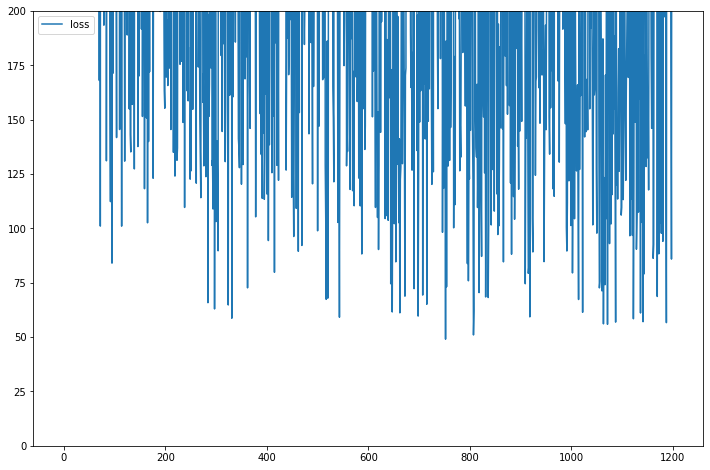

In [130]:
print(f"best loss = {hist.history['loss'][-1]}")
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))
plt.ylim([0,200])

y_pred = model(data[:,0].reshape(-1,1))

x = (y_pred[:,0] - data[:,1])/data[:,2]
xi2 = np.dot(x,x)
xi2

tf.Tensor([56.411076], shape=(1,), dtype=float32)


<ErrorbarContainer object of 3 artists>

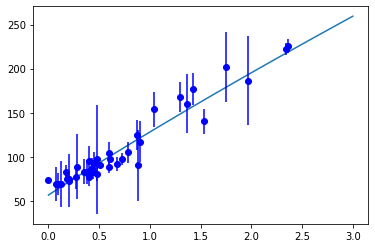

In [127]:
x_test = np.linspace(0,3,500)
y_test = model(x_test.reshape(-1,1))

print(y_test[0])
plt.plot(x_test,y_test)
plt.errorbar(data[:,0],data[:,1],yerr=data[:,2],fmt="bo")

In [57]:
sig_sqr = data[:,2]**2
1/sig_sqr

array([0.02040816, 0.01970867, 0.01900772, 0.01830893, 0.01761563,
       0.01693081, 0.01625714, 0.01559695, 0.01495221, 0.01432455,
       0.01371528, 0.01312542, 0.01255571, 0.01200666, 0.01147852,
       0.01097139, 0.01048518, 0.01001966, 0.0095745 , 0.00914925,
       0.0087434 , 0.00835637, 0.00798754, 0.00763625, 0.00730183,
       0.0069836 , 0.00668087, 0.00639294, 0.00611914, 0.00585881,
       0.0056113 , 0.00537598, 0.00515224, 0.0049395 , 0.00473719,
       0.00454477, 0.00436173, 0.00418758, 0.00402184, 0.00386408,
       0.00371387, 0.00357082, 0.00343453, 0.00330466, 0.00318086,
       0.00306281, 0.0029502 , 0.00284276, 0.0027402 , 0.00264228,
       0.00254875, 0.00245938, 0.00237396, 0.00229229, 0.00221417,
       0.00213942, 0.00206787, 0.00199936, 0.00193374, 0.00187086,
       0.00181059, 0.0017528 , 0.00169737, 0.00164418, 0.00159313,
       0.00154411, 0.00149703, 0.0014518 , 0.00140832, 0.00136652,
       0.00132632, 0.00128765, 0.00125043, 0.0012146 , 0.00118